# Anomaly Detection - Polynomial - Cosinus

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

np.random.seed(4)

## Parameters

In [2]:
nb_points = 50 # nombre de points
flattening = 5 # paramètre d'applatissement de la cos

nb_anomalies = 5 # nombre d'anomalies à générer
anomalies_noise = (1,3) # bruit à ajouter aux points anomalie

## Create Data

- X : timestamp
- y : values

In [3]:
X = np.array(range(nb_points))
y = np.cos(X/flattening)

Create anomalies

In [4]:
# Générer les indices des anomalies
anomalies_indices = np.random.choice(X.shape[0], size=nb_anomalies, replace=False)

# Générer le bruit à ajouter pour chaque anomalie
anomalies_values = np.random.uniform(anomalies_noise[0], anomalies_noise[1], size=nb_anomalies)

# Ajouter les anomalies aux points correspondants
y[anomalies_indices] += anomalies_values

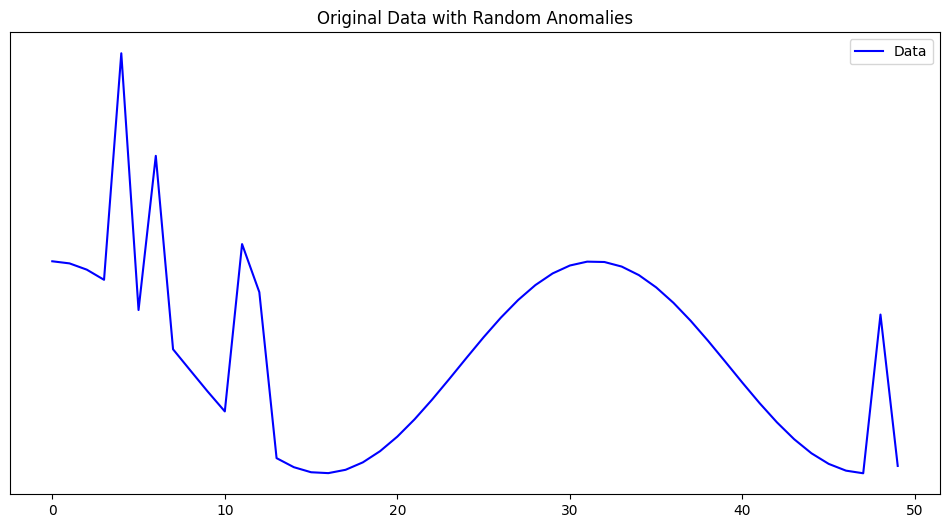

In [5]:
plt.figure(figsize=(12, 6))

plt.title("Original Data with Random Anomalies")
plt.plot(X, y, color="b", label="Data")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

## Polynomial Regression

In [6]:
# Paramètre de la regression polynomiale
degree = 5 # degré du polynome

In [7]:
# Création d'une pipeline de Regression
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# X -> vecteur colonne
X_ = X.reshape(-1, 1)

# Entraîner le modèle sur les données
polyreg.fit(X_, y)

y_pred = polyreg.predict(X_)

In [8]:
# Utiliser le modèle sur les données initiales
y_pred = polyreg.predict(X_)

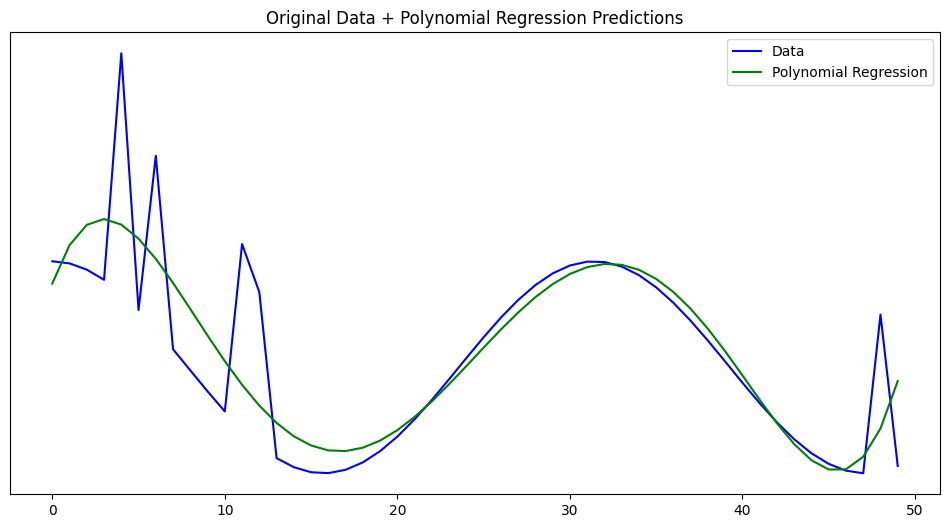

In [9]:
plt.figure(figsize=(12, 6))
plt.title("Original Data + Polynomial Regression Predictions")
plt.plot(X, y, color="blue", label='Data',)
plt.plot(X, y_pred, color='green', label='Polynomial Regression')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

## Confidence Interval

En supposant que les erreurs de prédiction suivent une distribution normale, nous allons définir les points anormaux en utilisant un intervalle de confiance autour de la régression polynomiale. Un point sera défini comme anormal s'il est distant d'au moins 2 écarts-types de cet intervalle.

In [10]:
# Calculer les résidus/erreurs
residuals = y - y_pred

# Calculer la distribution normale théorique des résidus
mu, std = np.mean(residuals), np.std(residuals)
xmin, xmax = np.min(residuals), np.max(residuals)
x = np.linspace(xmin, xmax, 100)
p = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_7352\1977360155.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Normale théorique')


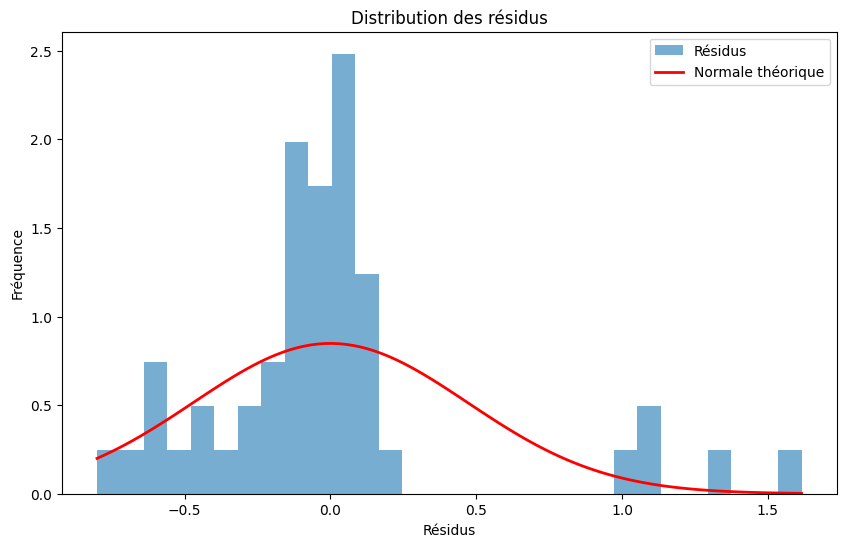

In [11]:
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, density=True, label='Résidus', alpha=0.6)
plt.plot(x, p, 'k', linewidth=2, color='red', label='Normale théorique')
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

In [12]:
# Calculer l'écart-type des résidus
std_residuals = np.std(residuals)

# Calculer l'intervalle de confiance
upper_bound = y_pred + 2 * std_residuals
lower_bound = y_pred - 2 * std_residuals

# Identifier les anomalies
anomalies = np.logical_or(y > upper_bound, y < lower_bound)

In [13]:
mean = np.mean(y)

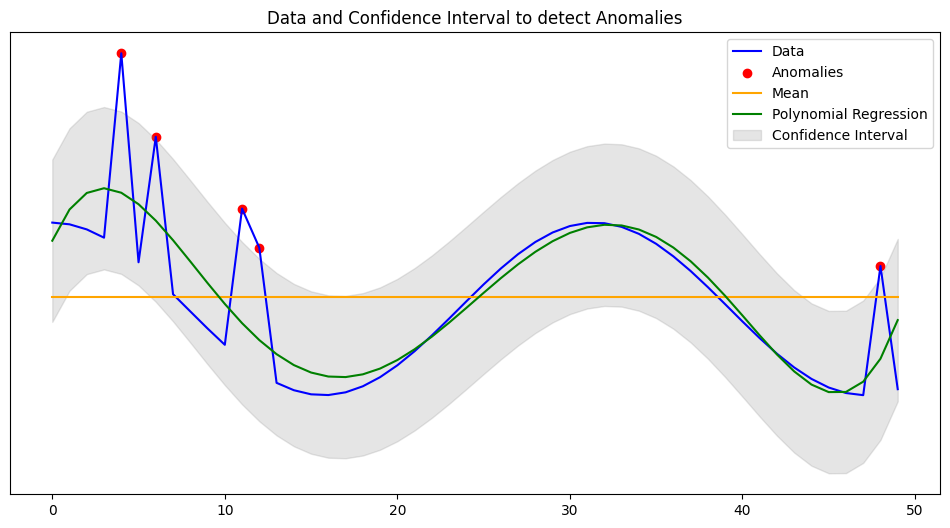

In [14]:
plt.figure(figsize=(12, 6))
plt.title("Data and Confidence Interval to detect Anomalies")
plt.plot(X, y, label='Data', color='blue')
plt.scatter(X[anomalies], y[anomalies], color='red', label='Anomalies')
plt.plot(X, [mean for i in range(len(X))], c="orange", label="Mean")
plt.plot(X, y_pred, color='green', label='Polynomial Regression')
plt.fill_between(X, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

## More Realistic Data

Nous allons ajuster les paramètre de génération des données pour observer le comportement et la regression et des détections sur un jeu de donnée "plus réaliste", c'est à dire ayant plus de points.

In [15]:
nb_points = 1000 # nombre de points
flattening = 2 # paramètre d'applatissement de la cos

nb_anomalies = 25 # nombre d'anomalies à générer
anomalies_noise = (2,3) # bruit à ajouter aux points anomalie

In [16]:
# Generate Data
X = np.array(range(nb_points))
y = np.cos(X/flattening)

In [17]:
# Generate Anomalies
anomalies_indices = np.random.choice(X.shape[0], size=nb_anomalies, replace=False)
anomalies_values = np.random.uniform(anomalies_noise[0], anomalies_noise[1], size=nb_anomalies)
y[anomalies_indices] += np.abs(anomalies_values)

In [18]:
degree = 100
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
X_ = X.reshape(-1, 1)
polyreg.fit(X_, y)

y_pred = polyreg.predict(X_)

In [19]:
residuals = y - y_pred

In [20]:
std_residuals = np.std(residuals)
upper_bound = y_pred + 2 * std_residuals
lower_bound = y_pred - 2 * std_residuals
anomalies = np.logical_or(y > upper_bound, y < lower_bound)

In [21]:
mean = np.mean(y)

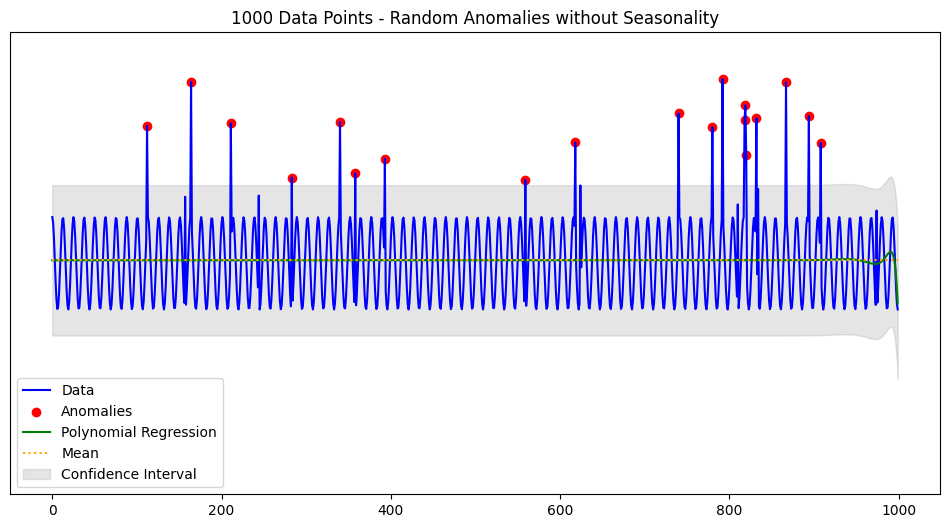

In [22]:
plt.figure(figsize=(12, 6))
plt.ylim([-5,5])
plt.title("1000 Data Points - Random Anomalies without Seasonality")
plt.plot(X, y, label='Data', color='blue')
plt.scatter(X[anomalies], y[anomalies], color='red', label='Anomalies')
plt.plot(X, y_pred, color='green', label='Polynomial Regression')
plt.plot(X, [mean for i in range(len(X))], c="orange", linestyle="dotted", label="Mean")
plt.fill_between(X, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

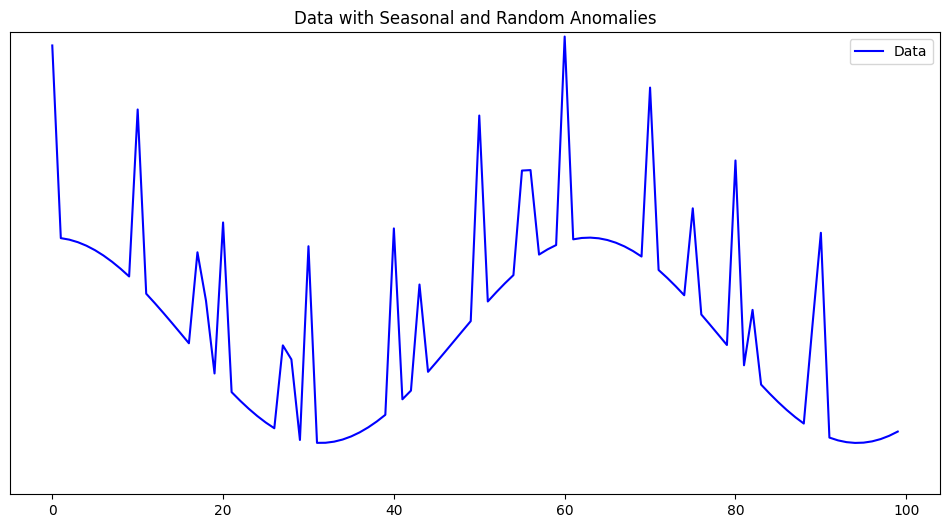

In [23]:
nb_points = 100 # nombre de points
flattening = 10 # paramètre d'aplatissement de la cos

seasonality_noise = (1.5,2) # bruit à ajouter aux points saisonniers
seasonality_period = 10 # période entre les anomalies saisonnières
random_anomalies_noise = (0.5,1) # bruit à ajouter aux anomalies aléatoires
nb_random_anomalies = 10 # nombre d'anomalies aléatoires à générer

# Générer les données
X = np.array(range(nb_points))
y = np.cos(X/flattening)
y_seasonal = y.copy() 
y_random = y.copy() 

# Générer les anomalies saisonnières
seasonal_anomalies_indices = np.array(range(0, nb_points, seasonality_period))
seasonal_anomalies_values = np.random.uniform(seasonality_noise[0], seasonality_noise[1], size=seasonal_anomalies_indices.shape[0])
y[seasonal_anomalies_indices] += np.abs(seasonal_anomalies_values)
y_seasonal[seasonal_anomalies_indices] = y[seasonal_anomalies_indices]

# Générer les anomalies aléatoires
random_anomalies_indices = np.random.choice(X.shape[0], size=nb_random_anomalies, replace=False)
random_anomalies_values = np.random.uniform(random_anomalies_noise[0], random_anomalies_noise[1], size=nb_random_anomalies)
y[random_anomalies_indices] += np.abs(random_anomalies_values)
y_random[random_anomalies_indices] = y[random_anomalies_indices]

plt.figure(figsize=(12, 6))
plt.title("Data with Seasonal and Random Anomalies")
plt.ylim([-1.5, 3])
plt.plot(X, y, color='blue', label="Data")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()


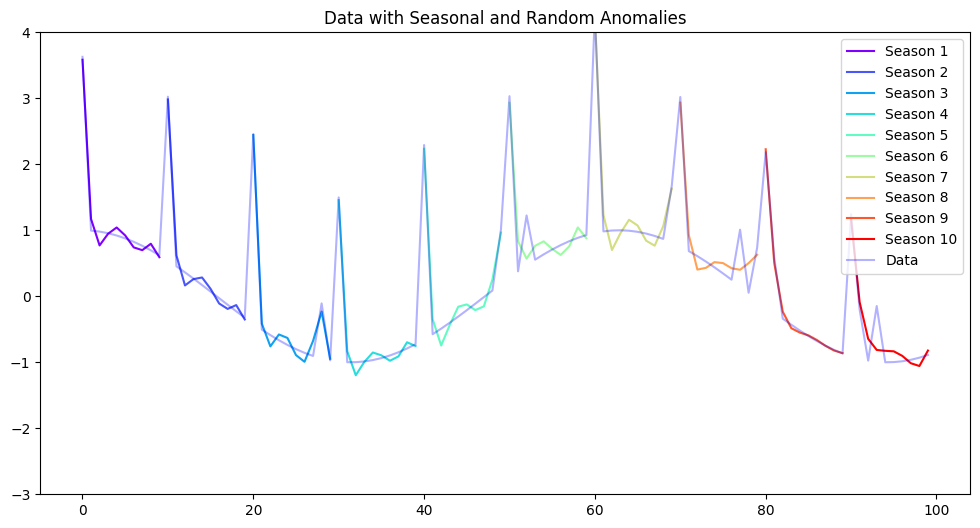

In [24]:
import matplotlib.cm as cm

nb_points = 100 # nombre de points
flattening = 10 # paramètre d'aplatissement de la cos

seasonality_noise = (2,3) # bruit à ajouter aux points saisonniers
seasonality_period = 10 # période entre les anomalies saisonnières
random_anomalies_noise = (0.7,1) # bruit à ajouter aux anomalies aléatoires
nb_random_anomalies = 10 # nombre d'anomalies aléatoires à générer

degree = 5 # polynome degree

# Générer les données
X = np.array(range(nb_points))
y = np.cos(X/flattening)
y_seasonal = y.copy() 
y_random = y.copy() 

# Générer les anomalies saisonnières
seasonal_anomalies_indices = np.array(range(0, nb_points, seasonality_period))
seasonal_anomalies_values = np.random.uniform(seasonality_noise[0], seasonality_noise[1], size=seasonal_anomalies_indices.shape[0])
y[seasonal_anomalies_indices] += np.abs(seasonal_anomalies_values)
y_seasonal[seasonal_anomalies_indices] = y[seasonal_anomalies_indices]

# Générer les anomalies aléatoires
random_anomalies_indices = np.random.choice(X.shape[0], size=nb_random_anomalies, replace=False)
random_anomalies_values = np.random.uniform(random_anomalies_noise[0], random_anomalies_noise[1], size=nb_random_anomalies)
y[random_anomalies_indices] += np.abs(random_anomalies_values)
y_random[random_anomalies_indices] = y[random_anomalies_indices]

# Préparer la régression polynomiale
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

plt.figure(figsize=(12, 6))
plt.title("Data with Seasonal and Random Anomalies")
plt.ylim([-3, 4])

colors = cm.rainbow(np.linspace(0, 1, seasonality_period))

# Faire une régression polynomiale pour chaque saison
for i in range(0, nb_points, seasonality_period):
    season_X = X[i:i+seasonality_period].reshape(-1, 1)
    season_y = y[i:i+seasonality_period]
    polyreg.fit(season_X, season_y)
    y_pred = polyreg.predict(season_X)
    plt.plot(season_X, y_pred, color=colors[i//seasonality_period % len(colors)], label=f"Season {i//seasonality_period+1}")

plt.plot(X, y, color='blue', label="Data", alpha=0.3)
plt.legend()
plt.show()


In [25]:
X = np.array(range(nb_points))
y = np.cos(X/flattening)

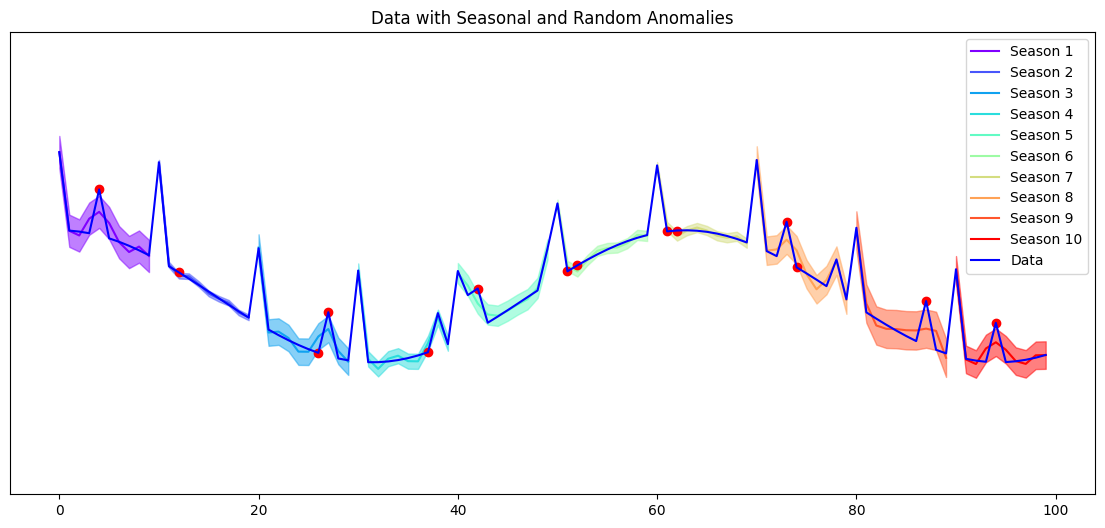

In [26]:
import matplotlib.cm as cm

nb_points = 100 # nombre de points
flattening = 10 # paramètre d'aplatissement de la cos

seasonality_noise = (1,1.5) # bruit à ajouter aux points saisonniers
seasonality_period = 10 # période entre les anomalies saisonnières
random_anomalies_noise = (0.5,0.7) # bruit à ajouter aux anomalies aléatoires
nb_random_anomalies = 10 # nombre d'anomalies aléatoires à générer

degree = 6 # polynome degree

# Générer les données
X = np.array(range(nb_points))
y = np.cos(X/flattening)
y_seasonal = y.copy() 
y_random = y.copy() 

# Générer les anomalies saisonnières
seasonal_anomalies_indices = np.array(range(0, nb_points, seasonality_period))
seasonal_anomalies_values = np.random.uniform(seasonality_noise[0], seasonality_noise[1], size=seasonal_anomalies_indices.shape[0])
y[seasonal_anomalies_indices] += np.abs(seasonal_anomalies_values)
y_seasonal[seasonal_anomalies_indices] = y[seasonal_anomalies_indices]

# Générer les anomalies aléatoires
random_anomalies_indices = np.random.choice(X.shape[0], size=nb_random_anomalies, replace=False)
random_anomalies_values = np.random.uniform(random_anomalies_noise[0], random_anomalies_noise[1], size=nb_random_anomalies)
y[random_anomalies_indices] += np.abs(random_anomalies_values)
y_random[random_anomalies_indices] = y[random_anomalies_indices]

# Préparer la régression polynomiale
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

plt.figure(figsize=(14, 6))
plt.title("Data with Seasonal and Random Anomalies")
plt.ylim([-3, 4])

colors = cm.rainbow(np.linspace(0, 1, seasonality_period))

# Faire une régression polynomiale pour chaque saison
for i in range(0, nb_points, seasonality_period):
    season_X = X[i:i+seasonality_period].reshape(-1, 1)
    season_y = y[i:i+seasonality_period]
    polyreg.fit(season_X, season_y)
    y_pred = polyreg.predict(season_X)
    
    # Calculate residuals/erros
    residuals = season_y - y_pred
    # Calculate the standard deviation of the residuals
    std_residuals = np.std(residuals)

    # Calculate the confidence interval
    upper_bound = y_pred + 1.6 * std_residuals
    lower_bound = y_pred - 1.6 * std_residuals

    plt.fill_between(season_X.flatten(), lower_bound, upper_bound, color=colors[i//seasonality_period % len(colors)], alpha=.5)
    plt.plot(season_X, y_pred, color=colors[i//seasonality_period % len(colors)], label=f"Season {i//seasonality_period+1}")

    # Identify the anomalies within the season
    anomalies_indices = np.where((season_y > upper_bound) | (season_y < lower_bound))
    plt.plot(season_X[anomalies_indices], season_y[anomalies_indices], 'ro')

plt.gca().axes.get_yaxis().set_visible(False)
plt.plot(X, y, color='blue', label="Data")
plt.legend()
plt.show()